In [1]:
# model architecture

# Input

# Conv1D
# BatchNorm
# Activation
# Dropout

# GRU
# Dropout
# BatchNorm

# GRU
# Dropout
# BatchNorm
# Dropout

# Dense
# TimeDistributed

In [2]:
# idea for how to split audio
# go through all of the y_preds
# if prediction is above a certain threshold and theres been ~70 of those predictions in a row you can cut the audio
# reason for 70 predictions in a row is that after the trigger word is said model will output a bunch of high probability values 
# that the trigger word has just been said and we want to cut the audio only once. 

In [1]:
import IPython
import numpy as np
import tensorflow as tf
import matplotlib as plt

from td_utils import *
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D

/home/novarac23/anaconda3/envs/tensorflowenv/lib/python3.7/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
# load data (data was preprocessed with data_prep notebook and uploaded to gdrive)
X_train = np.load("X_train_2.npy")
Y_train = np.load("Y_train_2.npy")

In [5]:
X_train.shape, Y_train.shape

((1500, 5511, 101), (1500, 1375))

In [2]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [7]:
t_x = 5511
t_y = 1375
number_of_frequencies = 101

In [8]:
input_x = Input(shape=(t_x, number_of_frequencies))

X = Conv1D(filters=196, kernel_size=15, strides=4)(input_x)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Dropout(rate=0.8)(X)

X = GRU(units=128, return_sequences=True)(X)
X = Dropout(rate=0.8)(X)
X = BatchNormalization()(X)

X = GRU(units=128, return_sequences=True)(X)
X = Dropout(rate=0.8)(X)
X = BatchNormalization()(X)
X = Dropout(rate=0.8)(X)

X = TimeDistributed(Dense(1, activation="sigmoid"))(X)

model = Model(inputs=input_x, outputs=X)

In [9]:
#optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)

In [10]:
#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy", f1_m])
#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy", f1_score])

In [11]:
X_train.shape

(1500, 5511, 101)

In [12]:
Y_train.shape

(1500, 1375)

In [13]:
Y_train.shape

(1500, 1375)

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5511, 101)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1375, 196)         297136    
_________________________________________________________________
batch_normalization (BatchNo (None, 1375, 196)         784       
_________________________________________________________________
activation (Activation)      (None, 1375, 196)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1375, 196)         0         
_________________________________________________________________
gru (GRU)                    (None, 1375, 128)         125184    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1375, 128)        

In [17]:
#150 
history = model.fit(X_train, Y_train, batch_size=12, epochs=150)

Epoch 1/150
125/125 [==============================] - 10s 82ms/step - loss: 0.3505 - accuracy: 0.8839 - f1_score: 0.0230
Epoch 2/150
125/125 [==============================] - 10s 82ms/step - loss: 0.2546 - accuracy: 0.9280 - f1_score: 0.0134
Epoch 3/150
125/125 [==============================] - 11s 85ms/step - loss: 0.1629 - accuracy: 0.9404 - f1_score: 0.4323
Epoch 4/150
125/125 [==============================] - 10s 83ms/step - loss: 0.1230 - accuracy: 0.9557 - f1_score: 0.6466
Epoch 5/150
125/125 [==============================] - 10s 83ms/step - loss: 0.1078 - accuracy: 0.9632 - f1_score: 0.7103
Epoch 6/150
125/125 [==============================] - 10s 83ms/step - loss: 0.0963 - accuracy: 0.9678 - f1_score: 0.7511
Epoch 7/150
125/125 [==============================] - 10s 84ms/step - loss: 0.0915 - accuracy: 0.9692 - f1_score: 0.7620
Epoch 8/150
125/125 [==============================] - 10s 84ms/step - loss: 0.0825 - accuracy: 0.9715 - f1_score: 0.7847
Epoch 9/150
125/125 [===

125/125 [==============================] - 10s 82ms/step - loss: 0.0368 - accuracy: 0.9874 - f1_score: 0.9088
Epoch 134/150
125/125 [==============================] - 10s 82ms/step - loss: 0.0379 - accuracy: 0.9868 - f1_score: 0.9036
Epoch 135/150
125/125 [==============================] - 10s 82ms/step - loss: 0.0358 - accuracy: 0.9876 - f1_score: 0.9092
Epoch 136/150
125/125 [==============================] - 10s 82ms/step - loss: 0.0361 - accuracy: 0.9873 - f1_score: 0.9070
Epoch 137/150
125/125 [==============================] - 10s 81ms/step - loss: 0.0365 - accuracy: 0.9874 - f1_score: 0.9078
Epoch 138/150
125/125 [==============================] - 10s 82ms/step - loss: 0.0370 - accuracy: 0.9873 - f1_score: 0.9069
Epoch 139/150
125/125 [==============================] - 10s 83ms/step - loss: 0.0371 - accuracy: 0.9872 - f1_score: 0.9064
Epoch 140/150
125/125 [==============================] - 10s 82ms/step - loss: 0.0360 - accuracy: 0.9875 - f1_score: 0.9086
Epoch 141/150
125/125 

In [18]:
# this is after second training session it had more of a smooth curve initially

loss = history.history['loss']
f1_s = history.history['f1_score']

epoch_count = range(1, len(loss) + 1)

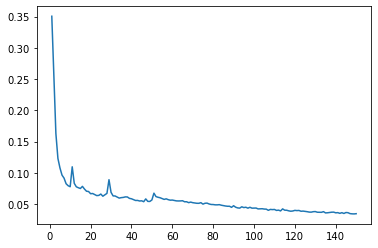

In [19]:
plt.plot(epoch_count, loss)

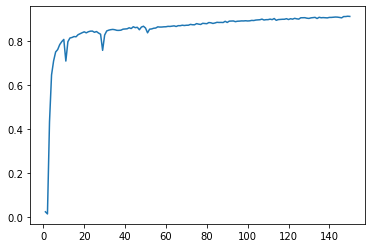

In [20]:
plt.plot(epoch_count, f1_s)

In [21]:
#model.save('saved_model/v2_1') - had an f1_score of ~0.95 and loss of 0.03 but had fixed input length
#model.save('saved_model/v2_2') # f1_score 82 and loss off 0.06 variable input length 
#model.save('saved_model/v2_3') # f1_score 0.91, loss 0.05, fixed length

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/v2_3/assets


In [3]:
#model = tf.keras.models.load_model('saved_model/v2_1', custom_objects={'f1_score': f1_score})
#model = tf.keras.models.load_model('saved_model/v2_2', custom_objects={'f1_score': f1_score})
model = tf.keras.models.load_model('saved_model/v2_3', custom_objects={'f1_score': f1_score})

In [4]:
def _detect_trigger_word(filename):
    plt.subplot(2, 1, 1)
    
    x_test = graph_spectrogram(filename)
    x_test = x_test.swapaxes(0,1)
    x_test = np.expand_dims(x_test, axis=0)
    
    predictions = model.predict(x_test)
    
    print(f'Shape of the prediction is: {predictions.shape}')
    
    plt.subplot(2,1,2)
    plt.plot(predictions[0, :, 0])
    plt.ylabel('probability')
    plt.show()
    return predictions

In [16]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_1.wav")
background = silent_audio.overlay(background)
background = background.set_frame_rate(44100)
background.export("dev_1.wav", format="wav")

<_io.BufferedRandom name='dev_1.wav'>

In [17]:
IPython.display.Audio("dev_1.wav")

In [20]:
prediction.shape

(1, 1375, 1)

In [21]:
tf.argmax(prediction, axis=1)

<tf.Tensor: shape=(1, 1), dtype=int64, numpy=array([[706]])>

In [22]:
prediction[0, :, 0][706]

0.9946871

(1, 1375, 1)
[9.4614670e-02 3.9580848e-02 1.1155632e-02 ... 8.0556729e-06 8.0425389e-06
 8.0295258e-06]


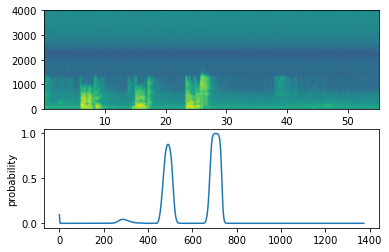

In [18]:
# v2_3
prediction = _detect_trigger_word("dev_1.wav")

In [26]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_2.wav")
background = silent_audio.overlay(background)
background = background.set_frame_rate(44100)
background.export("dev_2.wav", format="wav")

<_io.BufferedRandom name='dev_2.wav'>

In [28]:
IPython.display.Audio("dev_2.wav")

Shape of the prediction is: (1, 1375, 1)


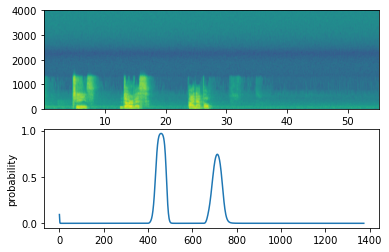

In [29]:
# v2_3
prediction = _detect_trigger_word("dev_2.wav")

In [30]:
cut_audio_on_trigger_word("dev_2.wav", prediction, .95)

In [31]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_3.wav")
background = silent_audio.overlay(background)
background.set_frame_rate(44100)
background.export("dev_3.wav", format="wav")

<_io.BufferedRandom name='dev_3.wav'>

In [32]:
IPython.display.Audio("dev_3.wav")

(1, 5521, 101)


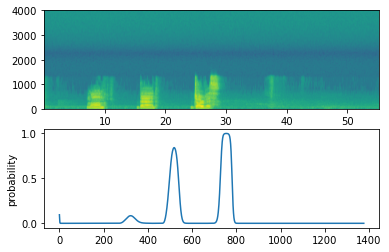

In [14]:
#v2_3
prediction = _detect_trigger_word("dev_3.wav")

In [37]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_4.wav")
background = silent_audio.overlay(background)
background = background.set_frame_rate(44100)
background.export("dev_4.wav", format="wav")

<_io.BufferedRandom name='dev_4.wav'>

In [20]:
IPython.display.Audio("dev_4.wav")

Shape of the prediction is: (1, 1375, 1)


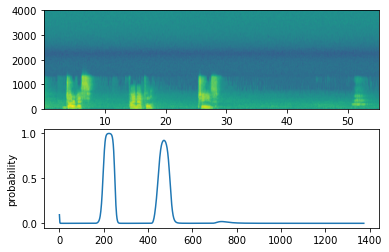

In [21]:
#v2_3
prediction = _detect_trigger_word("dev_4.wav")

In [27]:
cut_audio_on_trigger_word("dev_4.wav", prediction, .99)

In [42]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_5.wav")
background = silent_audio.overlay(background)
background = background.set_frame_rate(44100)
background.export("dev_5.wav", format="wav")

<_io.BufferedRandom name='dev_5.wav'>

In [17]:
IPython.display.Audio("dev_5.wav")

(1, 5511, 101)


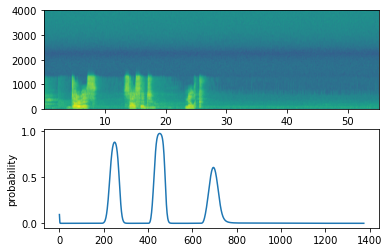

In [44]:
# v2_3
prediction = _detect_trigger_word("dev_5.wav")

In [45]:
silent_audio = AudioSegment.silent(duration=10000)
background = AudioSegment.from_wav("dev_6.wav")
background = silent_audio.overlay(background)
background = background.set_frame_rate(44100)
background.export("dev_6.wav", format="wav")

<_io.BufferedRandom name='dev_6.wav'>

In [18]:
IPython.display.Audio("dev_6.wav")

Shape of the prediction is: (1, 1375, 1)


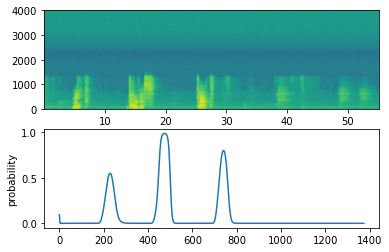

In [6]:
# v2_3
prediction = _detect_trigger_word("dev_6.wav")

In [8]:
cut_audio("dev_6.wav", prediction, .98)

In [4]:
X_test = np.load("X_test.npy")
Y_test = np.load("Y_test.npy")

In [5]:
X_test.shape

(6, 5511, 101)

In [6]:
Y_test.shape

(6, 1375)

In [7]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0968 - accuracy: 0.9491 - f1_score: 0.5405


[0.09684889763593674, 0.9490909576416016, 0.5404813289642334]

In [23]:
len(prediction[0, :, 0])

1375

In [25]:
def cut_audio_on_trigger_word(filename, predictions, threshold):
    audio_clip = AudioSegment.from_wav(filename)
    t_y = predictions.shape[1]
 
    for i in range(t_y):
        if predictions[0,i,0] > threshold:
            start_time = ((i / t_y) * audio_clip.duration_seconds)*1000
            cut_audio = audio_clip[start_time:]

    out_file = f'cut_{filename}'   
    cut_audio.export(out_file, format='wav')